# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set variables for base url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Setup URL query using the base url, api key, and units
query_url = f"{url}appid={api_key}&units={units}&q="

# Create lists to hold relevant data
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
latitude_list = []
longitude_list = []
maxtemperature_list = []
windspeed_list = []

# City counter for loop
citycounter = 0

# Header of print log
print("Retrieving data.")
print("----------------")

# Loop through list of cities
for eachcity in cities:
    
    # Perform a get request for each city and store json response in a variable
    jsonresponse = requests.get(query_url + eachcity).json()
    
    # Handle errors for cities with missing data
    try:
        
        # Retrieve specific data and append to relevant list
        # City
        city = jsonresponse['name']
        city_list.append(city)
        # Cloudiness
        cloudiness = jsonresponse['clouds']['all']
        cloudiness_list.append(cloudiness)
        # Country
        country = jsonresponse['sys']['country']
        country_list.append(country)
        # Data
        date = jsonresponse["dt"]
        date_list.append(date)
        # Humidity
        humidity = jsonresponse['main']['humidity']
        humidity_list.append(humidity)
        # Latitude
        latitude = jsonresponse['coord']['lat']
        latitude_list.append(latitude)
        # Longitude
        longitude = jsonresponse['coord']['lon']
        longitude_list.append(longitude)
        # Max temperature
        maxtemperature = jsonresponse['main']['temp_max']
        maxtemperature_list.append(maxtemperature)
        # Wind speed
        windspeed = jsonresponse['wind']['speed']
        windspeed_list.append(windspeed)
        
        # Track city count
        citycounter = citycounter + 1
        
        # Print log of each city
        print(f"City number {citycounter} is named {eachcity}.")
    
    except:
        
        # If the city is missing data, print different log and move to next city
        print('The data is incomplete for this city. Moving to next city...')
        pass

# Footer of print log
print("-----------------------------")
print("City data retrieval complete.")

Retrieving data.
----------------
City number 1 is named jamestown.
City number 2 is named solvychegodsk.
City number 3 is named aswan.
City number 4 is named saskylakh.
City number 5 is named lagoa.
City number 6 is named castro.
City number 7 is named punta arenas.
City number 8 is named fairbanks.
City number 9 is named ushuaia.
City number 10 is named nalut.
City number 11 is named ribeira grande.
City number 12 is named busselton.
City number 13 is named karla.
City number 14 is named kangaatsiaq.
City number 15 is named upernavik.
City number 16 is named tiksi.
The data is incomplete for this city. Moving to next city...
City number 17 is named lompoc.
City number 18 is named san patricio.
City number 19 is named broken hill.
City number 20 is named thompson.
City number 21 is named san jose.
City number 22 is named richards bay.
City number 23 is named dikson.
City number 24 is named albany.
City number 25 is named vanavara.
City number 26 is named nanortalik.
The data is incomp

City number 201 is named cockburn town.
City number 202 is named asheville.
City number 203 is named purpe.
City number 204 is named owasso.
City number 205 is named ahipara.
City number 206 is named sinnamary.
City number 207 is named skogn.
City number 208 is named tres picos.
The data is incomplete for this city. Moving to next city...
The data is incomplete for this city. Moving to next city...
City number 209 is named molina.
City number 210 is named tautira.
The data is incomplete for this city. Moving to next city...
City number 211 is named daru.
City number 212 is named san quintin.
City number 213 is named tommot.
City number 214 is named srednekolymsk.
City number 215 is named amet.
City number 216 is named ialibu.
The data is incomplete for this city. Moving to next city...
City number 217 is named manta.
City number 218 is named marang.
City number 219 is named matara.
City number 220 is named san rafael.
City number 221 is named erzin.
City number 222 is named cabo san lu

City number 393 is named volga.
City number 394 is named acapulco.
City number 395 is named alsfeld.
City number 396 is named mongo.
City number 397 is named acari.
City number 398 is named mayya.
City number 399 is named siva.
City number 400 is named tual.
City number 401 is named los llanos de aridane.
City number 402 is named hay river.
The data is incomplete for this city. Moving to next city...
City number 403 is named uige.
City number 404 is named magdagachi.
The data is incomplete for this city. Moving to next city...
City number 405 is named adrar.
City number 406 is named yafran.
The data is incomplete for this city. Moving to next city...
City number 407 is named burhanpur.
City number 408 is named paamiut.
City number 409 is named mananara.
City number 410 is named buchanan.
City number 411 is named poso.
City number 412 is named athabasca.
City number 413 is named azovskaya.
City number 414 is named hobyo.
City number 415 is named warrnambool.
City number 416 is named sai

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display data in a data frame
cityweather_df = pd.DataFrame({"City" : city_list, "Cloudiness" : cloudiness_list,
                          "Country" : country_list, "Date" : date_list,
                          "Humidity" : humidity_list, "Latitude" : latitude_list, 
                          "Longitude" : longitude_list, "Max Temperature" : maxtemperature_list, 
                          "Wind Speed" : windspeed_list})

# Convert 'Date' column to display in readable format
cityweather_df['Date'] = pd.to_datetime(cityweather_df['Date'], unit = 's')

cityweather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Jamestown,100,US,2022-02-12 05:29:42,69,42.0970,-79.2353,40.08,11.50
1,Sol'vychegodsk,100,RU,2022-02-12 05:29:42,97,61.3305,46.9156,16.32,4.29
2,Aswān,0,EG,2022-02-12 05:29:43,72,24.0934,32.9070,51.12,11.03
3,Saskylakh,76,RU,2022-02-12 05:27:23,82,71.9167,114.0833,1.90,12.97
4,Lagoa,95,PT,2022-02-12 05:29:43,80,39.0500,-27.9833,59.29,17.56
...,...,...,...,...,...,...,...,...,...
545,Chengzhong,100,CN,2022-02-12 05:33:50,80,30.9500,113.5500,44.65,8.81
546,Pacifica,20,US,2022-02-12 05:33:13,65,37.6138,-122.4869,64.83,10.36
547,Ballina,75,AU,2022-02-12 05:33:51,75,-28.8667,153.5667,73.44,12.66
548,Nizwá,0,OM,2022-02-12 05:33:51,38,22.9333,57.5333,70.30,3.33


In [5]:
# Export to CSV file
cityweather_df.to_csv("Output/cityweather.csv", index = False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Used information from:
# https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

# Get the indices of cities that have humidity over 100%.
humidityindex = cityweather_df[cityweather_df['Humidity'] > 100 ].index

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "cleancitydata_df".
cleancitydata_df = cityweather_df.drop(humidityindex, inplace = False)

# Same number of rows indicates that zero cities had a humidity > 100
cleancitydata_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Jamestown,100,US,2022-02-12 05:29:42,69,42.0970,-79.2353,40.08,11.50
1,Sol'vychegodsk,100,RU,2022-02-12 05:29:42,97,61.3305,46.9156,16.32,4.29
2,Aswān,0,EG,2022-02-12 05:29:43,72,24.0934,32.9070,51.12,11.03
3,Saskylakh,76,RU,2022-02-12 05:27:23,82,71.9167,114.0833,1.90,12.97
4,Lagoa,95,PT,2022-02-12 05:29:43,80,39.0500,-27.9833,59.29,17.56
...,...,...,...,...,...,...,...,...,...
545,Chengzhong,100,CN,2022-02-12 05:33:50,80,30.9500,113.5500,44.65,8.81
546,Pacifica,20,US,2022-02-12 05:33:13,65,37.6138,-122.4869,64.83,10.36
547,Ballina,75,AU,2022-02-12 05:33:51,75,-28.8667,153.5667,73.44,12.66
548,Nizwá,0,OM,2022-02-12 05:33:51,38,22.9333,57.5333,70.30,3.33


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

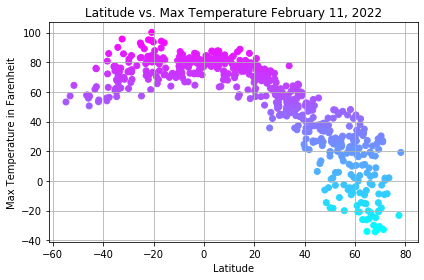

In [7]:
# Used information from:
# https://www.programiz.com/python-programming/datetime/current-datetime

# Scatter plot
plt.scatter(cleancitydata_df['Latitude'], cleancitydata_df['Max Temperature'], 
            c =cleancitydata_df['Max Temperature'], cmap= 'cool')

# Set textual properties
plt.title(f'Latitude vs. Max Temperature ' + time.strftime('%B %d, %Y'))
plt.ylabel('Max Temperature in Farenheit')
plt.xlabel('Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/latitude-temperature.png')

plt.show()

## Latitude vs. Humidity Plot

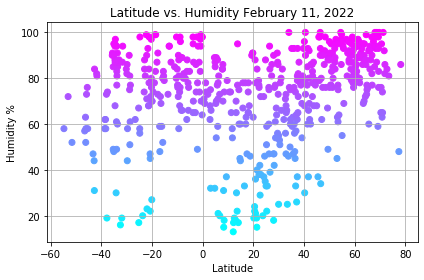

In [8]:
# Scatter plot
plt.scatter(cleancitydata_df['Latitude'], cleancitydata_df['Humidity'], 
            c =cleancitydata_df['Humidity'], cmap= 'cool')

# Set textual properties
plt.title(f'Latitude vs. Humidity ' + time.strftime('%B %d, %Y'))
plt.ylabel('Humidity %')
plt.xlabel('Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/latitude-humidity.png')

plt.show()

## Latitude vs. Cloudiness Plot

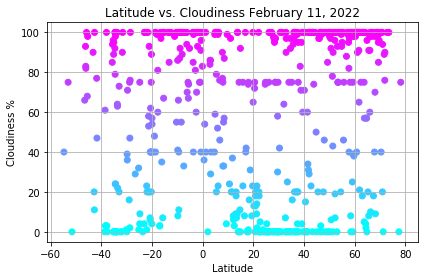

In [9]:
# Scatter plot
plt.scatter(cleancitydata_df['Latitude'], cleancitydata_df['Cloudiness'], 
            c =cleancitydata_df['Cloudiness'], cmap= 'cool')

# Set textual properties
plt.title(f'Latitude vs. Cloudiness ' + time.strftime('%B %d, %Y'))
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/latitude-cloudiness.png')

plt.show()

## Latitude vs. Wind Speed Plot

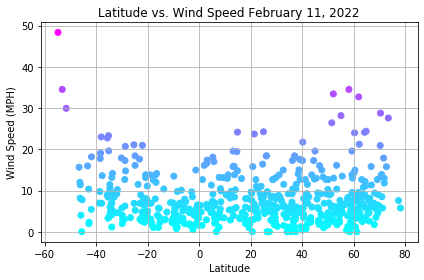

In [10]:
# Scatter plot
plt.scatter(cleancitydata_df['Latitude'], cleancitydata_df['Wind Speed'], 
            c =cleancitydata_df['Wind Speed'], cmap= 'cool')

# Set textual properties
plt.title(f'Latitude vs. Wind Speed ' + time.strftime('%B %d, %Y'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/latitude-windspeed.png')

plt.show()

## Linear Regression

In [11]:
# Split data into Northern and Southern Hemispheres
northernhemisphere = cleancitydata_df.loc[cleancitydata_df['Latitude'] > 0]
southernhemisphere = cleancitydata_df.loc[cleancitydata_df['Latitude'] < 0]

In [12]:
# Funciton for linear regression using specific hemisphere latitude vs y axis
def linearregression(xaxis, yaxis):
    # Perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
                                                                  
    # Get regression values
    regress_values = xaxis * slope + intercept
                                                                  
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Regression plot must be inside function to call regress_values
    plt.plot(xaxis, regress_values, "r-")
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    
    # Finish function and return line_eq to be used for plotting placement
    return line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7672038053678952


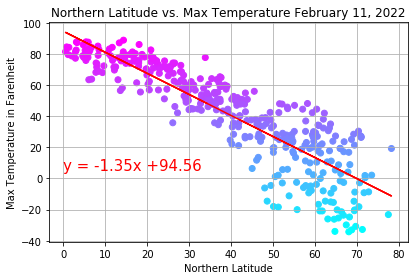

In [13]:
# Define x and y axis
xaxis = northernhemisphere['Latitude']
yaxis = northernhemisphere['Max Temperature']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(0,5),fontsize=15,color="red")

# Set textual properties
plt.title(f'Northern Latitude vs. Max Temperature ' + time.strftime('%B %d, %Y'))
plt.ylabel('Max Temperature in Farenheit')
plt.xlabel('Northern Latitude')


# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/northhemisphere-temperaturelatitude.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.22248116407196056


<function matplotlib.pyplot.show(*args, **kw)>

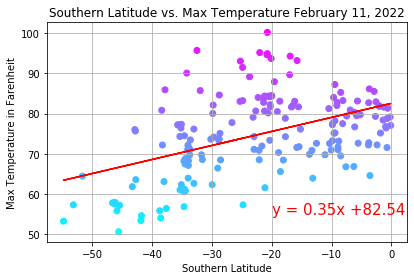

In [23]:
# Define x and y axis
xaxis = southernhemisphere['Latitude']
yaxis = southernhemisphere['Max Temperature']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(-20,55),fontsize=15,color="red")

# Set textual properties
plt.title(f'Southern Latitude vs. Max Temperature ' + time.strftime('%B %d, %Y'))
plt.ylabel('Max Temperature in Farenheit')
plt.xlabel('Southern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/southhemisphere-temperaturelatitude.png')

plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2543724411686645


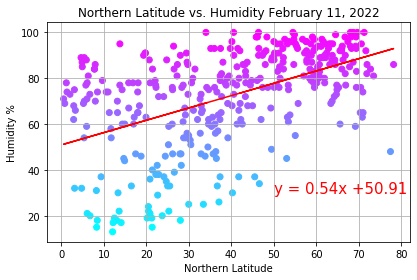

In [24]:
# Define x and y axis
xaxis = northernhemisphere['Latitude']
yaxis = northernhemisphere['Humidity']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(50,30),fontsize=15,color="red")

# Set textual properties
plt.title(f'Northern Latitude vs. Humidity ' + time.strftime('%B %d, %Y'))
plt.ylabel('Humidity %')
plt.xlabel('Northern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/northhemisphere-humiditylatitude.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07427806286449473


<function matplotlib.pyplot.show(*args, **kw)>

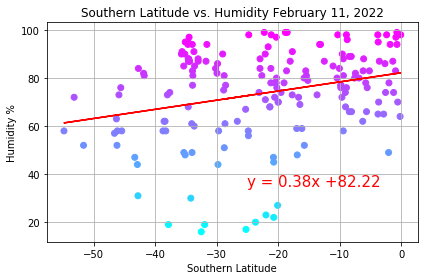

In [25]:
# Define x and y axis
xaxis = southernhemisphere['Latitude']
yaxis = southernhemisphere['Humidity']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(-25,35),fontsize=15,color="red")

# Set textual properties
plt.title(f'Southern Latitude vs. Humidity ' + time.strftime('%B %d, %Y'))
plt.ylabel('Humidity %')
plt.xlabel('Southern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/southhemisphere-humiditylatitude.png')

plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08555184225834082


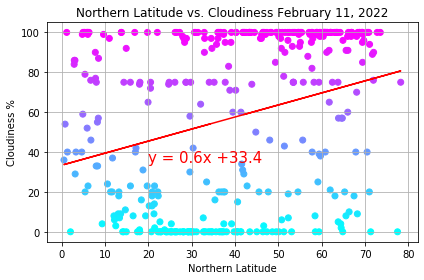

In [26]:
# Define x and y axis
xaxis = northernhemisphere['Latitude']
yaxis = northernhemisphere['Cloudiness']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(20,35),fontsize=15,color="red")

# Set textual properties
plt.title(f'Northern Latitude vs. Cloudiness ' + time.strftime('%B %d, %Y'))
plt.ylabel('Cloudiness %')
plt.xlabel('Northern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/northhemisphere-cloudinesslatitude.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09301824714526455


<function matplotlib.pyplot.show(*args, **kw)>

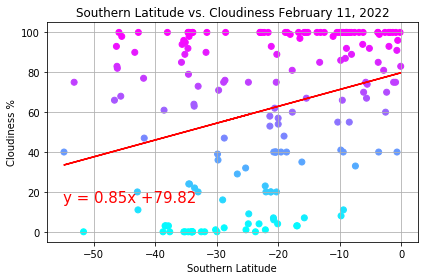

In [30]:
# Define x and y axis
xaxis = southernhemisphere['Latitude']
yaxis = southernhemisphere['Cloudiness']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(-55,15),fontsize=15,color="red")

# Set textual properties
plt.title(f'Southern Latitude vs. Cloudiness ' + time.strftime('%B %d, %Y'))
plt.ylabel('Cloudiness %')
plt.xlabel('Southern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/southhemisphere-cloudinesslatitude.png')

plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005656446699959015


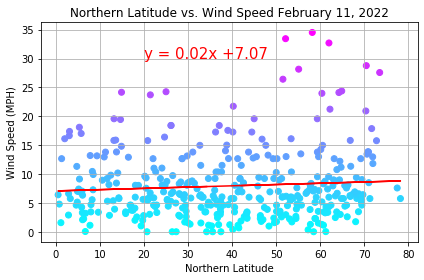

In [32]:
# Define x and y axis
xaxis = northernhemisphere['Latitude']
yaxis = northernhemisphere['Wind Speed']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(20,30),fontsize=15,color="red")

# Set textual properties
plt.title(f'Northern Latitude vs. Wind Speed ' + time.strftime('%B %d, %Y'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Northern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/northhemisphere-windspeedlatitude.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.21252732331542804


<function matplotlib.pyplot.show(*args, **kw)>

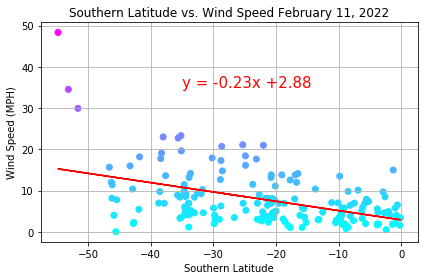

In [35]:
# Define x and y axis
xaxis = southernhemisphere['Latitude']
yaxis = southernhemisphere['Wind Speed']

# Scatter plot
plt.scatter(xaxis, yaxis, c = yaxis, cmap = 'cool')

# Linear regression
equation = linearregression(xaxis, yaxis)

# Print line equation
plt.annotate(equation,(-35,35),fontsize=15,color="red")

# Set textual properties
plt.title(f'Southern Latitude vs. Wind Speed ' + time.strftime('%B %d, %Y'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Southern Latitude')

# Format visualization
plt.grid()
plt.tight_layout()

# Save plot to images folder
plt.savefig('Images/southhemisphere-windspeedlatitude.png')

plt.show